^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 667.8 kB/s eta 0:00:10
    --------------------------------------- 0.1/6.2 MB 1.2 MB/s eta 0:00:06
   - -------------------------------------- 0.3/6.2 MB 2.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.6/6.2 MB 3.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.2/6.2 MB 5.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.3/6.2 MB 9.2 MB/s eta 0:00:01
   ------------------------- -------------- 4.0/6.2 MB 13.4 MB/s eta 0:00:01
   ------------------------------- -------- 4.9/6.2 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------  6.1/6.2 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 15.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ----------------------

In [24]:

import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
print(os.getcwd())

In [4]:



csv_file = "../Databases/Cavendish-Reformat.csv"
print(csv_file)
print(os.path.isfile(csv_file))
binaryParamsFile = np.genfromtxt(csv_file,delimiter=',')


../Databases/Cavendish-Reformat.csv
True


In [5]:
time1 = np.loadtxt(csv_file, delimiter=",", dtype=str, usecols=1, skiprows=1)
position1 = np.loadtxt(csv_file, delimiter=",", dtype=float, usecols=2, skiprows=1) * 1e-2
thetas1 = np.loadtxt(csv_file, delimiter=",", dtype=str, usecols=3)
theta1 = (thetas1[1]).astype(float) * 1e-2

# Display the first few rows
print(time1)
print(position1)
print(theta1)

['0' '20' '40' '60' '80' '100' '120' '140' '160' '180' '200' '220' '240'
 '260' '280' '300' '320' '340' '360' '380' '400' '420' '440' '460' '480'
 '500' '520' '540' '560' '580' '600' '620' '640' '660' '680' '700' '720'
 '740' '760' '780' '800' '820' '840' '860' '880' '900' '920' '940' '960'
 '980' '1000' '1020' '1040' '1060' '1080']
[0.865 0.848 0.805 0.753 0.695 0.656 0.64  0.654 0.69  0.736 0.784 0.818
 0.833 0.825 0.793 0.753 0.711 0.682 0.67  0.68  0.703 0.737 0.773 0.798
 0.809 0.803 0.783 0.754 0.724 0.701 0.692 0.695 0.714 0.738 0.763 0.782
 0.791 0.787 0.773 0.753 0.731 0.714 0.706 0.709 0.721 0.738 0.757 0.772
 0.779 0.776 0.767 0.752 0.736 0.723 0.717]
0.7465999999999999


In [19]:
time1 = np.array(time1, dtype=float)
position1 = np.array(position1, dtype=float)


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Guessed parameters: theta0 = 0.745, period = 241.517, amp = 0.121, delta = 1.526, b = 0.001
Fitted function: $\0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$


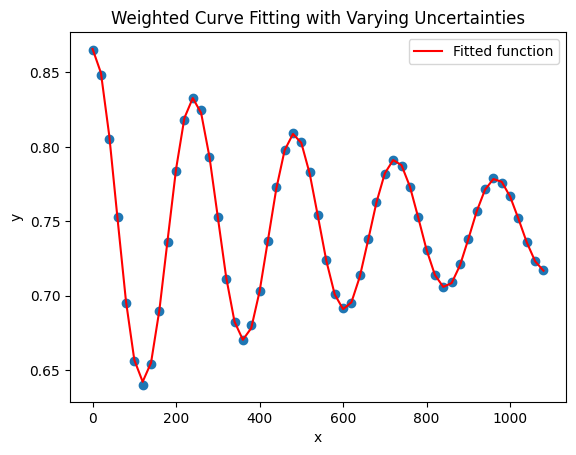

In [27]:


def damped_oscillation(time, theta0, period,amp,delta, b):
    """
    Function to be fit to the data. operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of osscilations
    period (_float_):
    delta (_float_): 
    b (_float_)
    """
    return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)


p, cov = curve_fit(damped_oscillation, time1, position1, p0 = [theta1, 240,.095, .01, 0.01])


# # Perform the weighted curve fitting
# popt, pcov = curve_fit(damped_oscillation, time1[0], position1[0], p0=[time1, theta1, .095, 240, .01, .01])

# # Extract fitted parameters and uncertainties
# t_fit, theta_fit, amp_fit, period_fit, delta_fit, b_fit = popt
# t_err, theta_err, amp_err, period_err, delta_err, b_err = np.sqrt(np.diag(pcov))

# # Print results
# print(f"Fitted parameters (weighted least squares with unique uncertainties):")
# print(f"a = {t_fit:.3f} ± {t_err:.3f}")
# print(f"mu = {theta_fit:.3f} ± {theta_err:.3f}")
# print(f"sigma = {amp_fit:.3f} ± {amp_err:.3f}")
# print(f"a = {period_fit:.3f} ± {period_err:.3f}")
# print(f"mu = {delta_fit:.3f} ± {delta_err:.3f}")
# print(f"sigma = {b_fit:.3f} ± {b_err:.3f}")

# Plot the data with error bars
# plt.plot(time1, damped_oscillation(time1, position1, *p), label='Fitted function', color='red')

print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Guessed parameters: theta0 = {p[0]:.3f}, period = {p[1]:.3f}, amp = {p[2]:.3f}, delta = {p[3]:.3f}, b = {p[4]:.3f}")

# Print the fitted function in LaTeX with the fitted parameters
fitted_function_latex = f"$\\{p[0]:.3f} + {p[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p[1]:.3f}}} t + {p[3]:.3f}\\right) \\cdot e^{{-{p[4]:.3f}t}}$"

print(f"Fitted function: {fitted_function_latex}")



plt.plot(time1, damped_oscillation(time1, *p), label='Fitted function', color='red')
plt.scatter(time1, position1)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


$\theta = 0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$